In [1]:
import os
import math
#import graphviz

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_bak_2015.csv'])
matrix_bak_2015 = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   studium_id              4081 non-null   int64  
 1   pohlavi_kod             4081 non-null   int64  
 2   je_cech                 4081 non-null   int64  
 3   datum_zahajeni          4081 non-null   int64  
 4   rok_maturity            4081 non-null   int64  
 5   maturita_nastup_rozdil  4081 non-null   int64  
 6   gymnazium               4081 non-null   int64  
 7   praha                   4081 non-null   int64  
 8   scio                    4081 non-null   int64  
 9   olym                    4081 non-null   int64  
 10  zkouska                 4081 non-null   int64  
 11  prominuti               4081 non-null   int64  
 12  dostudoval_uspesne      4081 non-null   int64  
 13  BI-PA1                  3918 non-null   float64
 14  BI-PAI                  3894 non-null   

In [4]:
matrix_bak_2015.mean()

studium_id                1.467385e+07
pohlavi_kod               1.261946e-01
je_cech                   7.757902e-01
datum_zahajeni            2.017257e+03
rok_maturity              2.016399e+03
maturita_nastup_rozdil    8.576329e-01
gymnazium                 5.449645e-01
praha                     6.508209e-01
scio                      9.605489e-02
olym                      1.021808e-01
zkouska                   3.479539e-02
prominuti                 2.719922e-02
dostudoval_uspesne        2.038716e-01
BI-PA1                    3.201506e+00
BI-PAI                    2.756292e+00
BI-CAO                    1.959115e+00
BI-PS1                    3.093703e+00
BI-MLO                    2.988975e+00
BI-ZMA                    3.206211e+00
BI-PA2                    2.968569e+00
BI-DBS                    2.548092e+00
BI-SAP                    2.444016e+00
BI-LIN                    3.248950e+00
BI-AG1                    2.840164e+00
BI-AAG                    2.787430e+00
BI-ZDM                   

## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak_2015 = matrix_bak_2015.set_index(['studium_id'])

### Odstranění příznaků

In [6]:
matrix_bak_2015 = matrix_bak_2015.drop(columns=['BI-DPR', 'pohlavi_kod', 'je_cech', 
                                                'prominuti', 'zkouska', 'olym', 
                                               'scio', 'praha', 'gymnazium'])

### Přidání příznaků

In [7]:
matrix_bak_2015['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].mean(axis=1)

In [8]:
matrix_bak_2015.mean()

datum_zahajeni            2017.256555
rok_maturity              2016.398922
maturita_nastup_rozdil       0.857633
dostudoval_uspesne           0.203872
BI-PA1                       3.201506
BI-PAI                       2.756292
BI-CAO                       1.959115
BI-PS1                       3.093703
BI-MLO                       2.988975
BI-ZMA                       3.206211
BI-PA2                       2.968569
BI-DBS                       2.548092
BI-SAP                       2.444016
BI-LIN                       3.248950
BI-AG1                       2.840164
BI-AAG                       2.787430
BI-ZDM                       2.900637
BI-OSY                       2.687002
BI-PSI                       2.627458
BI-BEZ                       2.512070
BI-PST                       2.375468
BI-SI1.2                     2.185497
BI-EMP                       1.817234
prumer                       3.068577
dtype: float64

### Doplnění NaN hodnot

##### Doplnění pomocí KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
matrix_bak_2015 = pd.DataFrame(imputer.fit_transform(matrix_bak_2015), index=matrix_bak_2015.index, columns=matrix_bak_2015.columns)

In [10]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datum_zahajeni          4081 non-null   float64
 1   rok_maturity            4081 non-null   float64
 2   maturita_nastup_rozdil  4081 non-null   float64
 3   dostudoval_uspesne      4081 non-null   float64
 4   BI-PA1                  4081 non-null   float64
 5   BI-PAI                  4081 non-null   float64
 6   BI-CAO                  4081 non-null   float64
 7   BI-PS1                  4081 non-null   float64
 8   BI-MLO                  4081 non-null   float64
 9   BI-ZMA                  4081 non-null   float64
 10  BI-PA2                  4081 non-null   float64
 11  BI-DBS                  4081 non-null   float64
 12  BI-SAP                  4081 non-null   float64
 13  BI-LIN                  4081 non-null   float64
 14  BI-AG1                  4081 

#### Zaokrouhlení doplněných hodnot

In [11]:
grades = [1, 1.5, 2, 2.5, 3, 4]

In [12]:
def custom_round(value):
    return min(grades, key=lambda x:abs(x-value))

In [13]:
matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-EMP'].applymap(custom_round)

In [14]:
matrix_bak_2015

datum_zahajeni  rok_maturity  maturita_nastup_rozdil  \
studium_id                                                         
19374606            2021.0        2009.0                    12.0   
12375406            2015.0        2009.0                     6.0   
11736906            2015.0        2009.0                     6.0   
12032306            2015.0        2007.0                     8.0   
15613006            2018.0        2009.0                     9.0   
12948006            2016.0        2010.0                     6.0   
11703806            2015.0        2010.0                     5.0   
12967806            2016.0        2010.0                     6.0   
11738606            2015.0        2010.0                     5.0   
11719706            2015.0        2010.0                     5.0   
11675306            2015.0        2010.0                     5.0   
12987806            2016.0        2010.0                     6.0   
11743906            2015.0        2010.0                     5.0   
13016006            2016.0        2010.0                     6.0   
12036006            2015.0        2010.0                     5.0   
13512306            2016.0        2011.0                     5.0   
12987706            2016.0        2010.0                     6.0   
11678106            2015.0        2010.0                     5.0   
13518506            2016.0        2011.0                     5.0   
14256606            2017.0        2011.0                     6.0   
11727206            2015.0        2011.0                     4.0   
11736306            2015.0        2011.0                     4.0   
12967906            2016.0        2011.0                     5.0   
11703506            2015.0        2011.0                     4.0   
13010106            2016.0        2011.0                     5.0   
14800306            2017.0        2011.0                     6.0   
11744706            2015.0        2011.0                     4.0   
11696406            2015.0        2010.0                     5.0   
12973406            2016.0        2011.0                     5.0   
11737806            2015.0        2011.0                     4.0   
12035506            2015.0        2011.0                     4.0   
13512006            2016.0        2011.0                     5.0   
12964406            2016.0        2011.0                     5.0   
12994106            2016.0        2011.0                     5.0   
11742506            2015.0        2011.0                     4.0   
11712706            2015.0        2011.0                     4.0   
13518806            2016.0        2011.0                     5.0   
11735606            2015.0        2011.0                     4.0   
13518606            2016.0        2011.0                     5.0   
15586306            2018.0        2011.0                     7.0   
13519806            2016.0        2011.0                     5.0   
11686106            2015.0        2012.0                     3.0   
11692606            2015.0        2012.0                     3.0   
13013306            2016.0        2012.0                     4.0   
11713906            2015.0        2012.0                     3.0   
12978506            2016.0        2012.0                     4.0   
14283706            2017.0        2012.0                     5.0   
11736706            2015.0        2012.0                     3.0   
11676006            2015.0        2012.0                     3.0   
12033706            2015.0        2012.0                     3.0   
12964506            2016.0        2012.0                     4.0   
16724706            2019.0        2012.0                     7.0   
12954706            2016.0        2012.0                     4.0   
12034706            2015.0        2012.0                     3.0   
12959206            2016.0        2012.0                     4.0   
14803806            2017.0        2012.0                     5.0   
11733706            2015.0        2012.0                     3.0   


### Pomocné promenné

In [15]:
# predmety podle doporuceneho semestru
courses_1 = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA']
courses_2 = ['BI-PA2', 'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_3 = ['BI-AAG', 'BI-ZDM', 'BI-AG1']
courses_4 = ['BI-OSY', 'BI-PSI', 'BI-BEZ']
courses_5 = ['BI-PST']
courses_6 = []
courses_7 = ['BI-SI1.2', 'BI-EMP']

courses = courses_1 + courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7

In [16]:
means = {'BI-PA1':3, 'BI-PAI':3, 'BI-CAO':2, 'BI-PS1':3, 'BI-MLO':3, 'BI-ZMA':3,
        'BI-PA2':3, 'BI-DBS':2.5, 'BI-SAP':2.5, 'BI-LIN':3,
        'BI-AAG':3, 'BI-ZDM':3, 'BI-AG1':3,
        'BI-OSY':2.5, 'BI-PSI':2.5, 'BI-BEZ':2.5,
        'BI-PST':2,
        'BI-SI1.2':2, 'BI-EMP':2
        }

prumer_mean = 3

### Nastavení target proměnné na nominální

In [17]:
dostudoval_uspesne_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
matrix_bak_2015['dostudoval_uspesne'] = matrix_bak_2015['dostudoval_uspesne'].astype(dostudoval_uspesne_category)

In [18]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   datum_zahajeni          4081 non-null   float64 
 1   rok_maturity            4081 non-null   float64 
 2   maturita_nastup_rozdil  4081 non-null   float64 
 3   dostudoval_uspesne      4081 non-null   category
 4   BI-PA1                  4081 non-null   float64 
 5   BI-PAI                  4081 non-null   float64 
 6   BI-CAO                  4081 non-null   float64 
 7   BI-PS1                  4081 non-null   float64 
 8   BI-MLO                  4081 non-null   float64 
 9   BI-ZMA                  4081 non-null   float64 
 10  BI-PA2                  4081 non-null   float64 
 11  BI-DBS                  4081 non-null   float64 
 12  BI-SAP                  4081 non-null   float64 
 13  BI-LIN                  4081 non-null   float64 
 14  BI-AG1       

### Nastavení atributů na kategorické - ordinální

In [19]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[1, 1.5, 2, 2.5, 3, 4, 0], ordered=True)
# BI-PA1
matrix_bak_2015['BI-PA1'] = matrix_bak_2015['BI-PA1'].astype(grades_category)
# BI-PAI
matrix_bak_2015['BI-PAI'] = matrix_bak_2015['BI-PAI'].astype(grades_category)
# BI-CAO
matrix_bak_2015['BI-CAO'] = matrix_bak_2015['BI-CAO'].astype(grades_category)
# BI-PS1
matrix_bak_2015['BI-PS1'] = matrix_bak_2015['BI-PS1'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-MLO'] = matrix_bak_2015['BI-MLO'].astype(grades_category)
# BI-ZMA
matrix_bak_2015['BI-ZMA'] = matrix_bak_2015['BI-ZMA'].astype(grades_category)
# BI-PA2
matrix_bak_2015['BI-PA2'] = matrix_bak_2015['BI-PA2'].astype(grades_category)
# BI-DBS
matrix_bak_2015['BI-DBS'] = matrix_bak_2015['BI-DBS'].astype(grades_category)
# BI-SAP
matrix_bak_2015['BI-SAP'] = matrix_bak_2015['BI-SAP'].astype(grades_category)
# BI-LIN
matrix_bak_2015['BI-LIN'] = matrix_bak_2015['BI-LIN'].astype(grades_category)
# BI-AG1
matrix_bak_2015['BI-AG1'] = matrix_bak_2015['BI-AG1'].astype(grades_category)
# BI-AAG
matrix_bak_2015['BI-AAG'] = matrix_bak_2015['BI-AAG'].astype(grades_category)
# BI-ZDM
matrix_bak_2015['BI-ZDM'] = matrix_bak_2015['BI-ZDM'].astype(grades_category)
# BI-OSY
matrix_bak_2015['BI-OSY'] = matrix_bak_2015['BI-OSY'].astype(grades_category)
# BI-PSI
matrix_bak_2015['BI-PSI'] = matrix_bak_2015['BI-PSI'].astype(grades_category)
# BI-BEZ
matrix_bak_2015['BI-BEZ'] = matrix_bak_2015['BI-BEZ'].astype(grades_category)
# BI-PST
matrix_bak_2015['BI-PST'] = matrix_bak_2015['BI-PST'].astype(grades_category)
# BI-SI1.2
matrix_bak_2015['BI-SI1.2'] = matrix_bak_2015['BI-SI1.2'].astype(grades_category)
# BI-MLO
matrix_bak_2015['BI-EMP'] = matrix_bak_2015['BI-EMP'].astype(grades_category)

In [20]:
matrix_bak_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4081 entries, 19374606 to 11740806
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   datum_zahajeni          4081 non-null   float64 
 1   rok_maturity            4081 non-null   float64 
 2   maturita_nastup_rozdil  4081 non-null   float64 
 3   dostudoval_uspesne      4081 non-null   category
 4   BI-PA1                  4081 non-null   category
 5   BI-PAI                  4081 non-null   category
 6   BI-CAO                  4081 non-null   category
 7   BI-PS1                  4081 non-null   category
 8   BI-MLO                  4081 non-null   category
 9   BI-ZMA                  4081 non-null   category
 10  BI-PA2                  4081 non-null   category
 11  BI-DBS                  4081 non-null   category
 12  BI-SAP                  4081 non-null   category
 13  BI-LIN                  4081 non-null   category
 14  BI-AG1       

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [21]:
Xdata = matrix_bak_2015.drop(columns='dostudoval_uspesne')
ydata = matrix_bak_2015.dostudoval_uspesne

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(4081, 23)

(4081,)

trénovací data


(3264, 23)

(3264,)

testovací data


(817, 23)

(817,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [23]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [24]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [25]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}

0.900760 (+/-0.016294) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.909928 (+/-0.014203) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.920968 (+/-0.015729) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.929033 (+/-0.009810) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.927533 (+/-0.032785) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.895958 (+/-0.027043) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.913877 (+/-0.027972) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.924203 (+/-0.010326) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.933638 (+/-0.007899) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.946400 (+/-0.018476) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [26]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.979473
accuracy score (test): 0.980416


In [27]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
13                  BI-AG1            0.744676
12                  BI-LIN            0.112428
16                  BI-OSY            0.054349
2   maturita_nastup_rozdil            0.039951
0           datum_zahajeni            0.017655
22                  prumer            0.017145
19                  BI-PST            0.010649
21                  BI-EMP            0.003147
6                   BI-PS1            0.000000
15                  BI-ZDM            0.000000
20                BI-SI1.2            0.000000
18                  BI-BEZ            0.000000
17                  BI-PSI            0.000000
3                   BI-PA1            0.000000
14                  BI-AAG            0.000000
7                   BI-MLO            0.000000
4                   BI-PAI            0.000000
5                   BI-CAO            0.000000
1             rok_maturity            0.000000
10                  BI-DBS            0.000000
9                   BI-PA2            0.000000
8                   BI-ZMA            0.000000
11                  BI-SAP            0.000000

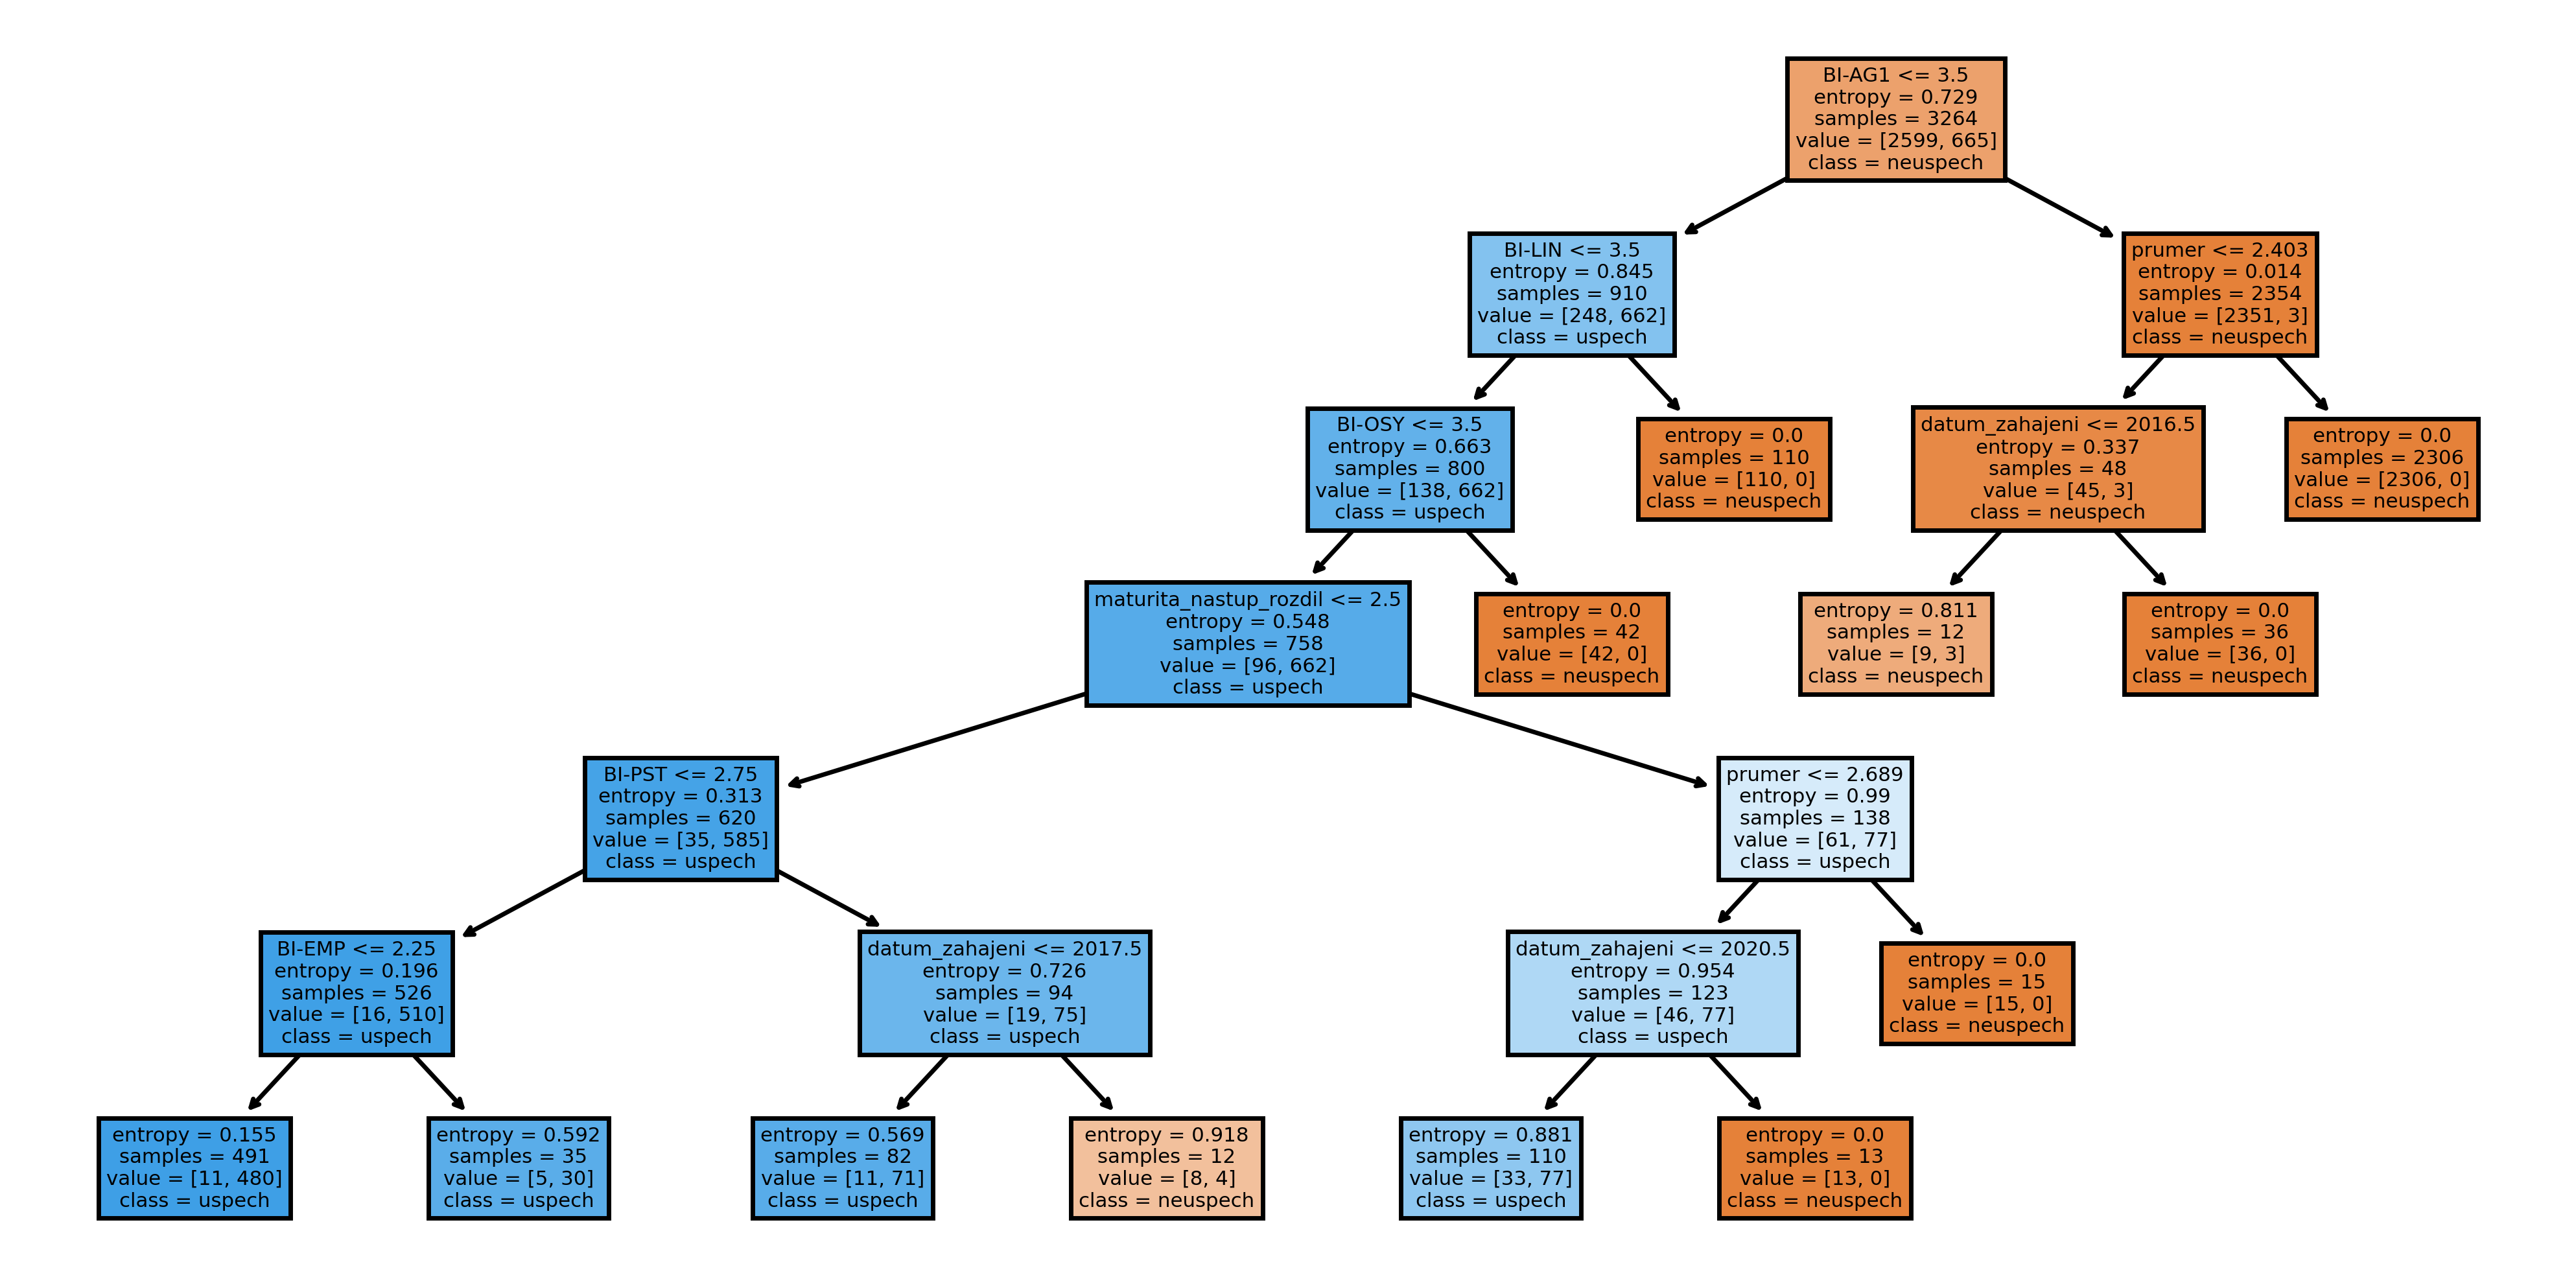

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1.png')

#### Random forest

In [29]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [30]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}

0.893483 (+/-0.038408) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.912632 (+/-0.026506) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.903829 (+/-0.037956) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.919667 (+/-0.031732) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.929204 (+/-0.009071) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.926631 (+/-0.018550) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.926268 (+/-0.013095) for {'criterion': 'gini', 'max_depth': 2, 

In [31]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.972120
accuracy score (test): 0.971848


In [32]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
13                  BI-AG1            0.248684
22                  prumer            0.216178
14                  BI-AAG            0.111322
12                  BI-LIN            0.100551
15                  BI-ZDM            0.096991
19                  BI-PST            0.066345
16                  BI-OSY            0.038334
18                  BI-BEZ            0.037599
9                   BI-PA2            0.033279
17                  BI-PSI            0.024804
3                   BI-PA1            0.011630
0           datum_zahajeni            0.004095
8                   BI-ZMA            0.003994
1             rok_maturity            0.002077
6                   BI-PS1            0.001687
2   maturita_nastup_rozdil            0.001604
5                   BI-CAO            0.000782
21                  BI-EMP            0.000044
10                  BI-DBS            0.000000
7                   BI-MLO            0.000000
4                   BI-PAI            0.000000
20                BI-SI1.2            0.000000
11                  BI-SAP            0.000000

#### SVM

In [33]:
param_grid_svm = {
    'kernel':['linear', 'rbf'],
    'gamma':['auto', 'scale'],
    'C':[100, 10, 1, 0.1]
}
param_comb_svm = ParameterGrid(param_grid_svm)

In [34]:
svc_f1 = get_best_parameters(param_grid_svm, SVC)

Best hyper-parameters are: 
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

0.933251 (+/-0.022356) for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.936767 (+/-0.033759) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.933251 (+/-0.022356) for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.931583 (+/-0.016838) for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.952146 (+/-0.033993) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.931583 (+/-0.016838) for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.930473 (+/-0.021387) for {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.954063 (+/-0.024063) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.930473 (+/-0.021387) for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.000000 (+/-0.000000) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.937469 (+/-0.023945) for {'C': 0.1, 'gamma': 'auto

In [35]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, svc_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, svc_f1.predict(Xtest))))

accuracy score (train): 0.987132
accuracy score (test): 0.980416


#### Adaboost

In [36]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [37]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.9, 'n_estimators': 40}

0.908844 (+/-0.007091) for {'learning_rate': 0.1, 'n_estimators': 5}
0.932179 (+/-0.011389) for {'learning_rate': 0.1, 'n_estimators': 10}
0.940660 (+/-0.014656) for {'learning_rate': 0.1, 'n_estimators': 15}
0.942848 (+/-0.017451) for {'learning_rate': 0.1, 'n_estimators': 20}
0.946952 (+/-0.020906) for {'learning_rate': 0.1, 'n_estimators': 25}
0.953154 (+/-0.024207) for {'learning_rate': 0.1, 'n_estimators': 30}
0.958005 (+/-0.026882) for {'learning_rate': 0.1, 'n_estimators': 35}
0.964390 (+/-0.032808) for {'learning_rate': 0.1, 'n_estimators': 40}
0.967830 (+/-0.026623) for {'learning_rate': 0.1, 'n_estimators': 45}
0.924790 (+/-0.022038) for {'learning_rate': 0.2, 'n_estimators': 5}
0.937972 (+/-0.022389) for {'learning_rate': 0.2, 'n_estimators': 10}
0.946809 (+/-0.019315) for {'learning_rate': 0.2, 'n_estimators': 15}
0.952005 (+/-0.020669) for {'learning_rate': 0.2, 'n_estimators': 20}
0.958463 (+/-0.02658

In [38]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.990809
accuracy score (test): 0.986536


In [39]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
19                  BI-PST               0.100
14                  BI-AAG               0.100
1             rok_maturity               0.100
22                  prumer               0.075
20                BI-SI1.2               0.075
10                  BI-DBS               0.050
21                  BI-EMP               0.050
17                  BI-PSI               0.050
15                  BI-ZDM               0.050
0           datum_zahajeni               0.050
2   maturita_nastup_rozdil               0.050
9                   BI-PA2               0.025
8                   BI-ZMA               0.025
12                  BI-LIN               0.025
13                  BI-AG1               0.025
7                   BI-MLO               0.025
16                  BI-OSY               0.025
5                   BI-CAO               0.025
18                  BI-BEZ               0.025
3                   BI-PA1               0.025
11                  BI-SAP               0.025
6                   BI-PS1               0.000
4                   BI-PAI               0.000

#### Xgboost

In [40]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [41]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.1, 'max_depth': 5}

0.961325 (+/-0.023291) for {'eta': 0.1, 'max_depth': 3}
0.963439 (+/-0.023255) for {'eta': 0.1, 'max_depth': 4}
0.965466 (+/-0.024439) for {'eta': 0.1, 'max_depth': 5}
0.961765 (+/-0.022619) for {'eta': 0.1, 'max_depth': 6}
0.962376 (+/-0.010579) for {'eta': 0.1, 'max_depth': 7}
0.962696 (+/-0.024239) for {'eta': 0.2, 'max_depth': 3}
0.961191 (+/-0.024981) for {'eta': 0.2, 'max_depth': 4}
0.960927 (+/-0.027807) for {'eta': 0.2, 'max_depth': 5}
0.958688 (+/-0.020044) for {'eta': 0.2, 'max_depth': 6}
0.956603 (+/-0.017874) for {'eta': 0.2, 'max_depth': 7}
0.958943 (+/-0.020875) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.958695 (+/-0.018912) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.954986 (+/-0.025138) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.952915 (+/-0.023429) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.955652 (+/-0.017625) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.956510 (+/-0.025113)

In [42]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.994792
accuracy score XGBoost (val): 0.982864


In [43]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [44]:
feat_imp

BI-AAG                    83.0
BI-AG1                    63.0
BI-ZDM                    59.0
BI-PST                    59.0
BI-OSY                    59.0
prumer                    52.0
BI-LIN                    51.0
datum_zahajeni            50.0
BI-PA1                    48.0
BI-EMP                    43.0
maturita_nastup_rozdil    42.0
BI-PA2                    33.0
BI-DBS                    32.0
BI-ZMA                    32.0
BI-SI1.2                  24.0
BI-PS1                    24.0
BI-MLO                    21.0
rok_maturity              18.0
BI-SAP                    18.0
BI-BEZ                    16.0
BI-PAI                    15.0
BI-PSI                    14.0
BI-CAO                    10.0
dtype: float64

#### MLP

In [45]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [46]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.897978
accuracy score mlp (val): 0.886169


#### Lineární regrese

In [47]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [48]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.5998423478363413
RMSE reg (test): 0.6088579029558862


#### kNN

In [49]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [50]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

0.921633 (+/-0.024580) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.921633 (+/-0.024580) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.918554 (+/-0.032072) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.918554 (+/-0.032072) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.922822 (+/-0.029993) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.921633 (+/-0.024580) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.921781 (+/-0.026862) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.917786 (+/-0.031572) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.928695 (+/-0.023908) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.929343 (+/-0.023846) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.921241 (+/-0.031228) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.921241 (+/-0.031228) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.93

In [51]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.983456
accuracy score knn (val): 0.964504


## Testování po semestrech

### Doplnění 0

#### Pouze nepředmětové příznaky

In [52]:
Xtest_0 = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0.loc[:, course] = 0
Xtest_0.loc[:, 'prumer'] = 5

#### 1. semestr

In [53]:
Xtest_1 = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1.loc[:, course] = 0

Xtest_1.loc[:, 'prumer'] = 5

#### První dva semestry

In [54]:
Xtest_2 = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2.loc[:, course] = 0
    
Xtest_2.loc[:, 'prumer'] = 5

#### První tři semestry

In [55]:
Xtest_3 = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3.loc[:, course] = 0
    
Xtest_3.loc[:, 'prumer'] = 5

#### První čtyři semestry 

In [56]:
Xtest_4 = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4.loc[:, course] = 0
    
Xtest_4.loc[:, 'prumer'] = 5

#### Prvních pět semestrů

In [57]:
Xtest_5 = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5.loc[:, course] = 0
    
Xtest_5.loc[:, 'prumer'] = 5

#### Všechny semestry bez SI1.2 a EMP

In [58]:
Xtest_6 = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6.loc[:, course] = 0
    
Xtest_6.loc[:, 'prumer'] = 5

### Doplnění průměrem

#### Pouze nepředmětové příznaky

In [59]:
Xtest_0_mean = Xtest.copy(deep=True)

courses_not_use = courses
for course in courses_not_use:
    Xtest_0_mean.loc[:, course] = means[course]
Xtest_0_mean.loc[:, 'prumer'] = prumer_mean

#### První semestr

In [60]:
Xtest_1_mean = Xtest.copy(deep=True)

courses_not_use = courses_2 + courses_3 + courses_4 + courses_5 + courses_6 + courses_7
for course in courses_not_use:
    Xtest_1_mean.loc[:, course] = means[course]

Xtest_1_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-ZMA'].mean(axis=1)
Xtest_1_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První dva semestry

In [61]:
Xtest_2_mean = Xtest.copy(deep=True)

courses_not_use = courses_3 + courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_2_mean.loc[:, course] = means[course]
    
Xtest_2_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-LIN'].mean(axis=1)
Xtest_2_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První tři semestry

In [62]:
Xtest_3_mean = Xtest.copy(deep=True)

courses_not_use = courses_4 + courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_3_mean.loc[:, course] = means[course]
    
Xtest_3_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-ZDM'].mean(axis=1)
Xtest_3_mean['prumer'].fillna(prumer_mean, inplace=True)

#### První čtyři semestry 

In [63]:
Xtest_4_mean = Xtest.copy(deep=True)

courses_not_use = courses_5 + courses_6 + courses_7

for course in courses_not_use:
    Xtest_4_mean.loc[:, course] = means[course]
    
Xtest_4_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-BEZ'].mean(axis=1)
Xtest_4_mean['prumer'].fillna(prumer_mean, inplace=True)

#### Prvních pět semestrů

In [64]:
Xtest_5_mean = Xtest.copy(deep=True)

courses_not_use = courses_6 + courses_7

for course in courses_not_use:
    Xtest_5_mean.loc[:, course] = means[course]
    
Xtest_5_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-PST'].mean(axis=1)
Xtest_5_mean['prumer'].fillna(prumer_mean, inplace=True)

#### Všechny semestry bez SI1.2 a EMP

In [65]:
Xtest_6_mean = Xtest.copy(deep=True)

courses_not_use = courses_7

for course in courses_not_use:
    Xtest_6_mean.loc[:, course] = means[course]
    
Xtest_6_mean['prumer'] = matrix_bak_2015.loc[:, 'BI-PA1':'BI-PST'].mean(axis=1)
Xtest_6_mean['prumer'].fillna(prumer_mean, inplace=True)

## Výsledky

In [66]:
results = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

results_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_mean_f1 = pd.DataFrame(columns=['dt', 'rf', 'svm', 'ab', 'xgb', 'mlp', 'knn'], index=[0, 1, 2, 3, 4, 5, 6, 7])

In [67]:
results_reg = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])
results_reg_mean = pd.DataFrame(columns=['reg'], index=[0, 1, 2, 3, 4, 5, 6, 7])

### Linearní regrese měřena pomocí RMSE

#### Doplněno 0

In [68]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):   
    results_reg.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test[i]), np.array(ytest))), 3)

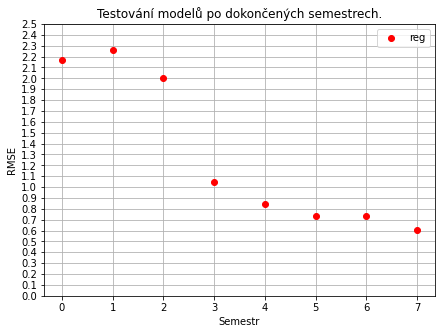

In [69]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg['reg'].index
yreg = results_reg['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.plot(xreg, yreg, 'o', color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [70]:
results_reg

reg
0  2.169
1  2.257
2  2.006
3  1.046
4  0.842
5  0.736
6  0.736
7  0.609

#### Doplněno průměrem

In [71]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_reg_mean.loc[i, 'reg'] = round(np.sqrt(mean_squared_error(reg.predict(x_test_mean[i]), np.array(ytest))), 3)

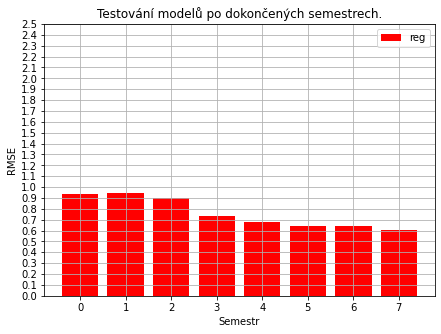

In [72]:
plt.figure(figsize=(7,5))
plt.grid(True)

xreg = results_reg_mean['reg'].index
yreg = results_reg_mean['reg'].values

y_values = np.arange(0.0, 2.55, 0.1)

plt.bar(xreg, yreg, color='r', label='reg')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('RMSE')

plt.legend()

plt.show()

In [73]:
results_reg_mean

reg
0  0.936
1  0.947
2  0.902
3  0.733
4  0.677
5   0.64
6   0.64
7  0.609

## Ostatní modely
### Měřeno accuracy_score

In [74]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test[i])), 3)
    results.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test[i])), 3)
    results.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test[i])), 3)
    results.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test[i])), 3)
    results.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test[i])), 3)
    results.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test[i])), 3)

In [75]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean.loc[i, 'dt'] = round(metrics.accuracy_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'rf'] = round(metrics.accuracy_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'svm'] = round(metrics.accuracy_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'ab'] = round(metrics.accuracy_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'xgb'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'mlp'] = round(metrics.accuracy_score(ytest, mlp.predict(x_test_mean[i])), 3)
    results_mean.loc[i, 'knn'] = round(metrics.accuracy_score(ytest, knn.predict(x_test_mean[i])), 3)

#### Po doplnění 0

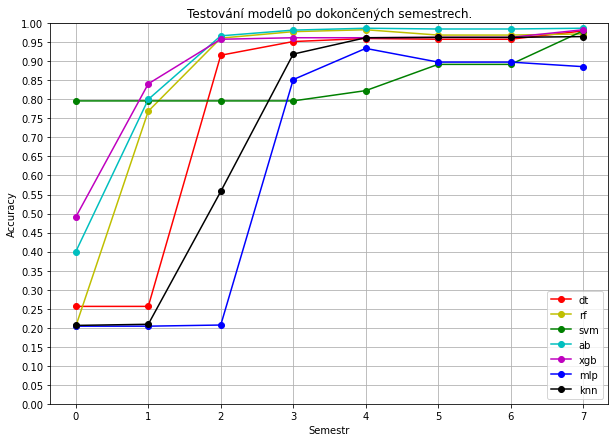

In [76]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results['dt'].index
ydt = results['dt'].values

xrf = results['rf'].index
yrf = results['rf'].values

xsvm = results['svm'].index
ysvm = results['svm'].values

xab = results['ab'].index
yab = results['ab'].values

xxgb = results['xgb'].index
yxgb = results['xgb'].values

xmlp = results['mlp'].index
ymlp = results['mlp'].values

xknn = results['knn'].index
yknn = results['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

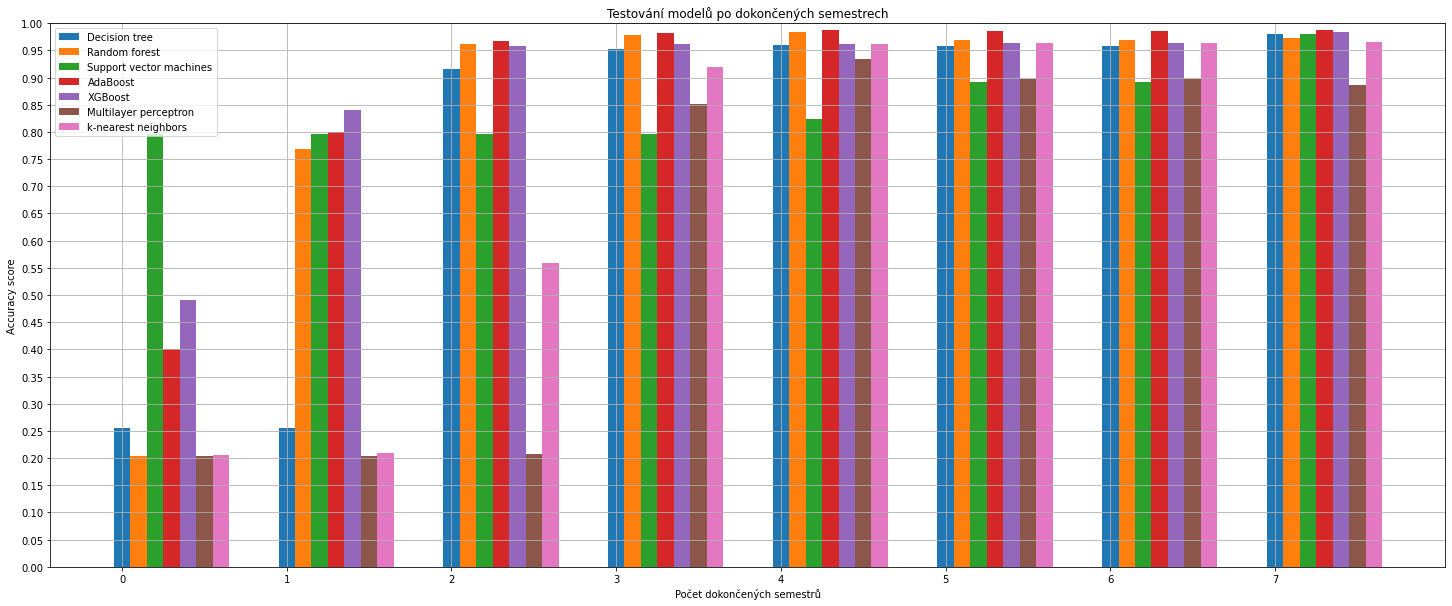

In [78]:
labels = np.array(results.index)

ydt = results['dt'].values

yrf = results['rf'].values

ysvm = results['svm'].values

yab = results['ab'].values

yxgb = results['xgb'].values

ymlp = results['mlp'].values

yknn = results['knn'].values

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots()
rects_dt = ax.bar(x , ydt, width, label='Decision tree')
rects_rf = ax.bar(x + width, yrf, width, label='Random forest')
rects_svm = ax.bar(x + width * 2, ysvm, width, label='Support vector machines')
rects_ab = ax.bar(x + width * 3, yab, width, label='AdaBoost')
rects_xgb = ax.bar(x + width * 4, yxgb, width, label='XGBoost')
rects_mlp = ax.bar(x + width * 5, ymlp, width, label='Multilayer perceptron')
rects_knn = ax.bar(x + width * 6, yknn, width, label='k-nearest neighbors')

y_values = np.arange(0.0, 1.05, 0.05)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Počet dokončených semestrů')
ax.set_title('Testování modelů po dokončených semestrech')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.yticks(y_values)
ax.legend(loc='best')
ax.grid(True)

plt.ylim(ymin=0)
plt.ylim(ymax=1)

fig.set_size_inches(25,10)
plt.show()

In [79]:
results

dt     rf    svm     ab    xgb    mlp    knn
0  0.256  0.204  0.796    0.4  0.491  0.204  0.206
1  0.256  0.769  0.796    0.8  0.841  0.204  0.209
2  0.916  0.961  0.796  0.967  0.958  0.207  0.558
3  0.952  0.978  0.796  0.982  0.962  0.852  0.919
4   0.96  0.983  0.823  0.987  0.962  0.934  0.962
5  0.958  0.969  0.892  0.985  0.963  0.898  0.963
6  0.958  0.969  0.892  0.985  0.963  0.898  0.963
7   0.98  0.972   0.98  0.987  0.983  0.886  0.965

#### Po doplněni průměrem

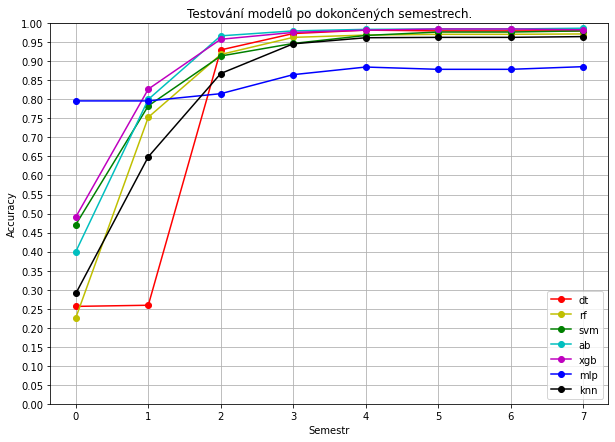

In [88]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean['dt'].index
ydt = results_mean['dt'].values

xrf = results_mean['rf'].index
yrf = results_mean['rf'].values

xsvm = results_mean['svm'].index
ysvm = results_mean['svm'].values

xab = results_mean['ab'].index
yab = results_mean['ab'].values

xxgb = results_mean['xgb'].index
yxgb = results_mean['xgb'].values

xmlp = results_mean['mlp'].index
ymlp = results_mean['mlp'].values

xknn = results_mean['knn'].index
yknn = results_mean['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')

plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('Accuracy')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [81]:
results_mean

dt     rf    svm     ab    xgb    mlp    knn
0  0.256  0.226  0.471    0.4  0.491  0.796   0.29
1  0.259  0.753  0.783    0.8  0.827  0.796  0.649
2   0.93  0.918  0.914  0.967  0.958  0.815  0.868
3  0.973  0.963  0.947   0.98  0.976  0.865  0.946
4  0.982  0.969  0.968  0.984  0.982  0.885  0.962
5   0.98  0.971  0.977  0.985  0.985  0.879  0.963
6   0.98  0.971  0.977  0.985  0.985  0.879  0.963
7   0.98  0.972   0.98  0.987  0.983  0.886  0.965

### Měřeno f1_score

In [82]:
x_test = {0:Xtest_0, 1:Xtest_1, 2:Xtest_2, 3:Xtest_3, 4:Xtest_4, 5:Xtest_5, 6:Xtest_6, 7:Xtest}
for i in range(0, 8):
    results_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test[i])), 3)
    results_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

In [83]:
x_test_mean = {0:Xtest_0_mean, 1:Xtest_1_mean, 2:Xtest_2_mean, 3:Xtest_3_mean, 4:Xtest_4_mean, 5:Xtest_5_mean, 6:Xtest_6_mean, 7:Xtest}
for i in range(0, 8):
    results_mean_f1.loc[i, 'dt'] = round(metrics.f1_score(ytest, dt_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'rf'] = round(metrics.f1_score(ytest, rf_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'svm'] = round(metrics.f1_score(ytest, svc_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'ab'] = round(metrics.f1_score(ytest, ab_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'xgb'] = round(metrics.f1_score(ytest, xgb_f1.predict(x_test_mean[i])), 3)
    results_mean_f1.loc[i, 'mlp'] = round(metrics.f1_score(ytest, mlp.predict(x_test[i])), 3)
    results_mean_f1.loc[i, 'knn'] = round(metrics.f1_score(ytest, knn.predict(x_test[i])), 3)

#### Po doplnění 0

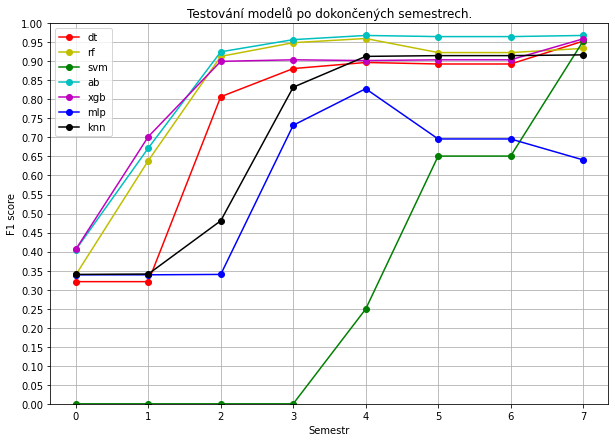

In [89]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_f1['dt'].index
ydt = results_f1['dt'].values

xrf = results_f1['rf'].index
yrf = results_f1['rf'].values

xsvm = results_f1['svm'].index
ysvm = results_f1['svm'].values

xab = results_f1['ab'].index
yab = results_f1['ab'].values

xxgb = results_f1['xgb'].index
yxgb = results_f1['xgb'].values

xmlp = results_f1['mlp'].index
ymlp = results_f1['mlp'].values

xknn = results_f1['knn'].index
yknn = results_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [85]:
results_f1

dt     rf    svm     ab    xgb    mlp    knn
0  0.321  0.339      0  0.405  0.406  0.339   0.34
1  0.321  0.639      0  0.672  0.702  0.339  0.341
2  0.807  0.913      0  0.925    0.9   0.34  0.481
3  0.881  0.949      0  0.957  0.904  0.732  0.832
4  0.897   0.96  0.249  0.968  0.902  0.828  0.913
5  0.893  0.923  0.651  0.965  0.904  0.696  0.915
6  0.893  0.923  0.651  0.965  0.904  0.696  0.915
7  0.953  0.934  0.953  0.968  0.959  0.641  0.917

#### Po doplněni průměrem

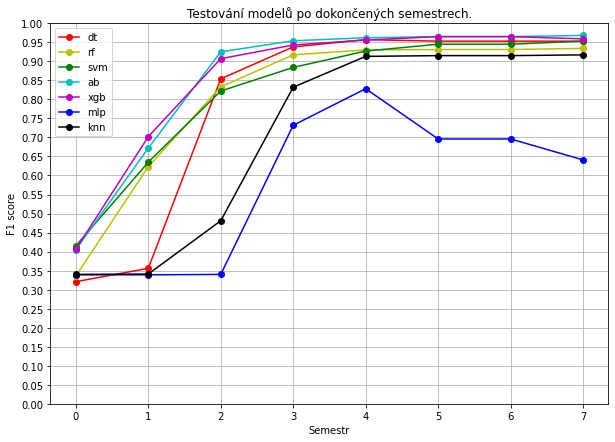

In [90]:
plt.figure(figsize=(10,7))
plt.grid(True)

xdt = results_mean_f1['dt'].index
ydt = results_mean_f1['dt'].values

xrf = results_mean_f1['rf'].index
yrf = results_mean_f1['rf'].values

xsvm = results_mean_f1['svm'].index
ysvm = results_mean_f1['svm'].values

xab = results_mean_f1['ab'].index
yab = results_mean_f1['ab'].values

xxgb = results_mean_f1['xgb'].index
yxgb = results_mean_f1['xgb'].values

xmlp = results_mean_f1['mlp'].index
ymlp = results_mean_f1['mlp'].values

xknn = results_mean_f1['knn'].index
yknn = results_mean_f1['knn'].values

y_values = np.arange(0.0, 1.05, 0.05)

plt.plot(xdt, ydt, '-o', color='r', label='dt')
plt.plot(xrf, yrf, '-o', color='y', label='rf')
plt.plot(xsvm, ysvm, '-o', color='g', label='svm')
plt.plot(xab, yab, '-o', color='c', label='ab')
plt.plot(xxgb, yxgb, '-o', color='m', label='xgb')
plt.plot(xmlp, ymlp, '-o', color='b', label='mlp')
plt.plot(xknn, yknn, '-o', color='k', label='knn')


plt.title('Testování modelů po dokončených semestrech.')

plt.yticks(y_values)
plt.xlabel('Semestr')
plt.ylabel('F1 score')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [87]:
results_mean_f1

dt     rf    svm     ab    xgb    mlp    knn
0  0.321  0.336  0.415  0.405  0.406  0.339   0.34
1  0.356  0.623  0.635  0.672  0.702  0.339  0.341
2  0.854  0.833  0.822  0.925  0.907   0.34  0.481
3  0.938  0.917  0.884  0.954  0.943  0.732  0.832
4  0.957   0.93  0.927  0.962  0.956  0.828  0.913
5  0.953  0.931  0.945  0.965  0.965  0.696  0.915
6  0.953  0.931  0.945  0.965  0.965  0.696  0.915
7  0.953  0.934  0.953  0.968  0.959  0.641  0.917